# 1. Definición del problema
- Las enfermedades cardiovasculares (ECV) son la principal causa de muerte a nivel mundial, cobrando un estimado de 17,9 millones de vidas cada año, lo que representa el 31% de todas las muertes en todo el mundo.
  La insuficiencia cardíaca es un evento común causado por las enfermedades cardiovasculares y este conjunto de datos contiene 12 características que pueden usarse para predecir la mortalidad por insuficiencia cardíaca.

  La mayoría de las enfermedades cardiovasculares se pueden prevenir abordando los factores de riesgo conductuales como el consumo de tabaco, la dieta poco saludable y la obesidad, la inactividad física y el consumo nocivo de alcohol mediante estrategias que abarquen a toda la población.

  Las personas con enfermedad cardiovascular o que se encuentran en alto riesgo cardiovascular (debido a la presencia de uno o más factores de riesgo como hipertensión, diabetes, hiperlipidemia o enfermedad ya establecida) necesitan una detección y manejo precoces donde un modelo de aprendizaje automático puede ser de gran ayuda.
- El principal objetivo de este estudio es predecir la mortalidad causada por la insuficiencia cardiaca

# 2. Cargar lo datos
* para predecir la mortalidad por insuficiencia cardiaca utilizaremos el dataset proveido por Davide Chicco, Giuseppe Jurman: Machine learning can predict survival of patients with heart failure from serum creatinine and ejection fraction alone. BMC Medical Informatics and Decision Making 20, 16 (2020).

* Glosario de columnas:
  - age: edad del paciente (años)
  - anaemia: disminución de glóbulos rojos o hemoglobina (booleano)
  - high blood pressure: si el paciente tiene hipertensión (booleano)
  - creatinine phosphokinase (CPK): nivel de la enzima CPK en la sangre (mcg/L)
  - diabetes: si el paciente tiene diabetes (boolean)
  - ejection fraction: porcentaje de sangre que sale del corazón en cada contracción (porcentaje)
  - platelets: plaquetas en la sangre (kiloplaquetas/mL)
  - sex: mujer o hombre (binario)
  - serum creatinine: nivel de creatinina sérica en sangre (mg/dL)
  - serum sodium: nivel de sodio serico en la sangre (mEq/L)
  - smoking: si el paciente fuma o no (booleano)
  - time: periodo de seguimiento (dias)
  - [target] death event: si el paciente falleció durante el período de seguimiento (booleano) 

- 2.1 importar librerias necesarias
- 2.2 cargar el dataset

In [1]:
# 2.1 importar librerias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [48]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

In [3]:
# 2.2 cargar el dataset
heart_f = pd.read_csv('heart_failure_clinical_records_dataset.csv')
heart_f.head(5)

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


# 3. Resumir el dataset
* 3.1 Dimensiones del conjunto de datos
* 3.2 Vistaso de los datos en si
* 3.3 Resumen estadistico de todas las columnas
* 3.4 Desgloce de datos por columnas

In [4]:
# 3.1 Dimensiones del conjunto de datos
heart_f.shape

(299, 13)

In [5]:
# 3.1.1 Mostrar información de las columnas
heart_f.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


In [6]:
# 3.2 Vistaso de los datos en si
pd.DataFrame(heart_f.head(5)).append(pd.DataFrame(heart_f.tail(5)))

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1
294,62.0,0,61,1,38,1,155000.00,1.1,143,1,1,270,0
295,55.0,0,1820,0,38,0,270000.00,1.2,139,0,0,271,0
296,45.0,0,2060,1,60,0,742000.00,0.8,138,0,0,278,0
297,45.0,0,2413,0,38,0,140000.00,1.4,140,1,1,280,0
298,50.0,0,196,0,45,0,395000.00,1.6,136,1,1,285,0


In [7]:
# 3.3 Resumen estadistico de todas las columnas
heart_f.describe()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
count,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.00000,299.000000,299.000000,299.00000,299.000000,299.00000
mean,60.833893,0.431438,581.839465,0.418060,38.083612,0.351171,263358.029264,1.39388,136.625418,0.648829,0.32107,130.260870,0.32107
std,11.894809,0.496107,970.287881,0.494067,11.834841,0.478136,97804.236869,1.03451,4.412477,0.478136,0.46767,77.614208,0.46767
min,40.000000,0.000000,23.000000,0.000000,14.000000,0.000000,25100.000000,0.50000,113.000000,0.000000,0.00000,4.000000,0.00000
25%,51.000000,0.000000,116.500000,0.000000,30.000000,0.000000,212500.000000,0.90000,134.000000,0.000000,0.00000,73.000000,0.00000
50%,60.000000,0.000000,250.000000,0.000000,38.000000,0.000000,262000.000000,1.10000,137.000000,1.000000,0.00000,115.000000,0.00000
75%,70.000000,1.000000,582.000000,1.000000,45.000000,1.000000,303500.000000,1.40000,140.000000,1.000000,1.00000,203.000000,1.00000
max,95.000000,1.000000,7861.000000,1.000000,80.000000,1.000000,850000.000000,9.40000,148.000000,1.000000,1.00000,285.000000,1.00000


In [8]:
# 3.4 Desgloce de datos por columnas
heart_f.groupby('DEATH_EVENT').size()

DEATH_EVENT
0    203
1     96
dtype: int64

# 4. Visualización de datos
* 4.1 Graficos Univariable
* 4.2 Graficos Multivariable

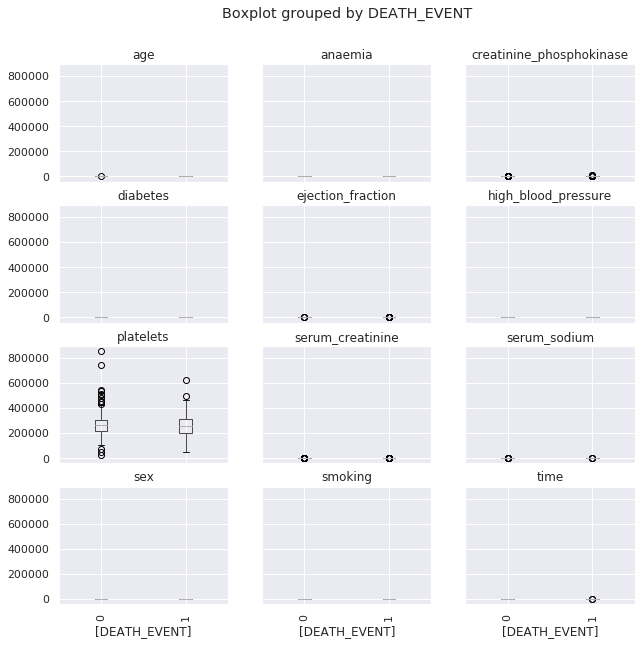

In [9]:
# 4.1 Graficos Univariable
# Grafico de caja y bigotes
heart_f.boxplot(rot=90, layout=(4,3), by='DEATH_EVENT', figsize=(10,10));

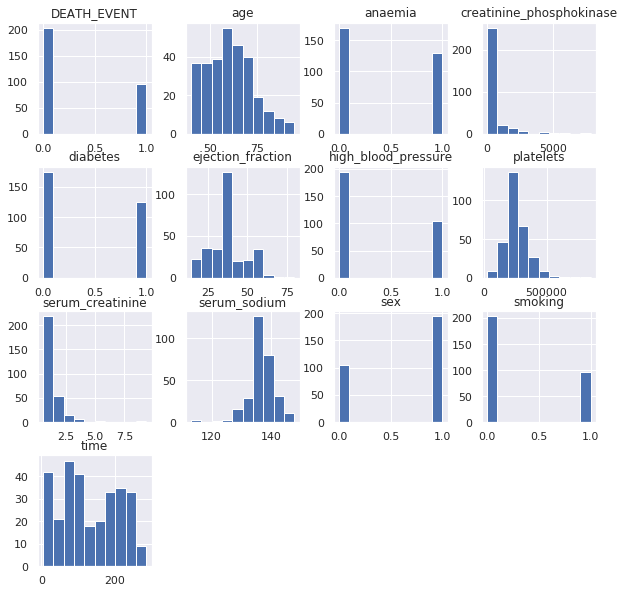

In [10]:
heart_f.hist(figsize=(10,10));

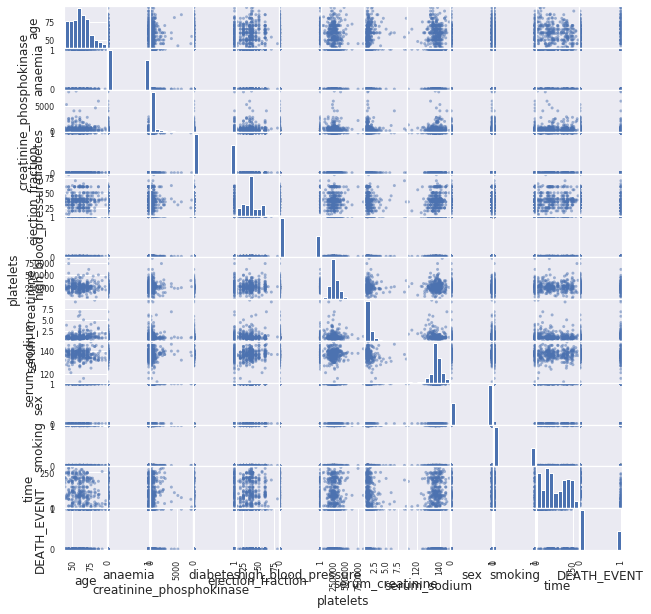

In [11]:
# 4.2 Graficos Multivariables
from pandas.plotting import scatter_matrix
scatter_matrix(heart_f, figsize=(10,10));

# 5. Evaluar algunos algoritmos
* 5.1 Dividir el dataset en variables dependientes e independientes
* 5.2 Marco de pruebas (test harness)
* 5.3 Construir modelos
* 5.4 seleccionar el mejor modelo

In [33]:
# 5.1 Dividir el dataset en variables dependientes e independientes
X = heart_f.drop(columns=['DEATH_EVENT']).values
y = heart_f['DEATH_EVENT'].values

In [34]:
print(X.shape)

print(y.shape)

(299, 12)
(299,)


In [35]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [52]:
# 5.3 Construir modelos
# Algoritmos de verificación puntual
modelos = []
modelos.append(('LR', LogisticRegression(solver='liblinear', multi_class='ovr')))
modelos.append(('LDA', LinearDiscriminantAnalysis()))
# modelos.append(('KNN', KNeighborsRegressor()))
modelos.append(('DTR', DecisionTreeRegressor()))
modelos.append(('NB', GaussianNB()))
modelos.append(('SVM', SVC(gamma='auto')))

#Evaluar cada modelo por turnos
resultado = []
nombres = []
for nombre, modelo in modelos:
    kfold = StratifiedKFold(n_splits=10, random_state=42, shuffle=True)
    cv_resultado = cross_val_score(modelo, X_train, y_train, cv=kfold, scoring='accuracy')
    resultado.append(cv_resultado)
    nombres.append(nombre)
    print('%s: %f (%f)' % (nombres, cv_resultado.mean(), cv_resultado.std()))

['LR']: 0.861957 (0.049366)
['LR', 'LDA']: 0.828261 (0.066319)
['LR', 'LDA', 'DTR']: 0.798913 (0.059347)
['LR', 'LDA', 'DTR', 'NB']: 0.803442 (0.061638)
['LR', 'LDA', 'DTR', 'NB', 'SVM']: 0.702899 (0.012655)
